[Reference](https://pub.towardsai.net/toyota-v-s-bmw-v-s-tesla-stock-analysis-using-python-3762caa1713a)

In [6]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 9.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [3]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2020,1,1)

In [4]:
toyota = web.DataReader('TM','yahoo',start,end)
toyota.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,126.639999,124.889999,126.230003,125.669998,250000.0,102.994781
2015-01-05,124.610001,123.050003,124.440002,123.370003,240600.0,101.109795
2015-01-06,123.720001,121.209999,123.400002,122.099998,285600.0,100.068932
2015-01-07,126.059998,125.059998,125.519997,125.169998,385700.0,102.584991
2015-01-08,127.699997,126.449997,126.449997,127.580002,498800.0,104.560150


In [5]:
bmw = web.DataReader('BMWYY','yahoo',start,end)
bmw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,35.340000,35.060001,35.279999,35.279999,33100.0,26.743088
2015-01-05,34.060001,33.610001,34.049999,33.849998,59300.0,25.659115
2015-01-06,34.500000,33.869999,34.259998,33.910000,298700.0,25.704599
2015-01-07,34.340000,33.810001,34.040001,34.240002,120400.0,25.954748
2015-01-08,35.259998,34.480000,34.490002,35.099998,95800.0,26.606646


In [6]:
tesla = web.DataReader('TSLA','yahoo',start,end)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500,42.124001


# Linear plot


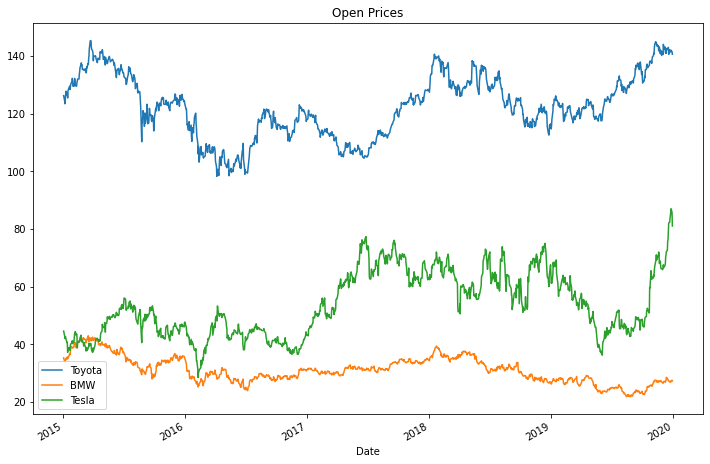

In [7]:
toyota['Open'].plot(label='Toyota',title='Open Prices',figsize=(12,8))
bmw['Open'].plot(label='BMW')
tesla['Open'].plot(label='Tesla')
plt.legend()

# Stock volume plot


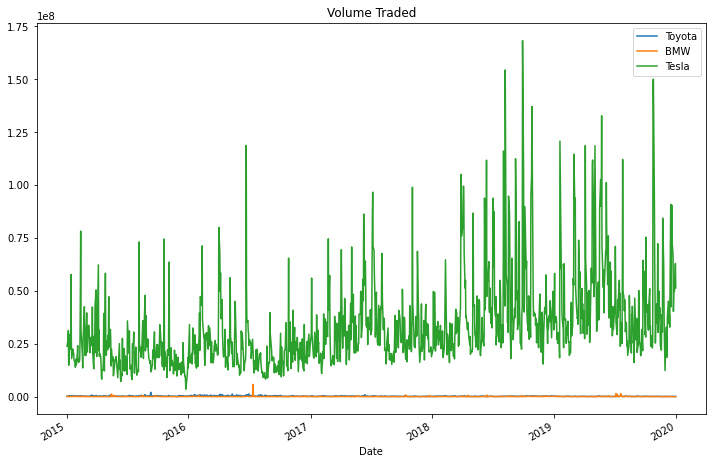

In [8]:
toyota['Volume'].plot(label='Toyota',title='Volume Traded',figsize=(12,8))
bmw['Volume'].plot(label='BMW')
tesla['Volume'].plot(label='Tesla')
plt.legend()

In [9]:
m = tesla['Volume'].max()
tesla.loc[tesla['Volume']==m]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-28,55.599998,52.112,54.051998,52.953999,168248500,52.953999


# Total amount traded plot


In [10]:
toyota['Total trade amount'] = toyota['Open']*toyota['Volume']
bmw['Total trade amount'] = bmw['Open']*bmw['Volume']
tesla['Total trade amount'] = tesla['Open']*tesla['Volume']

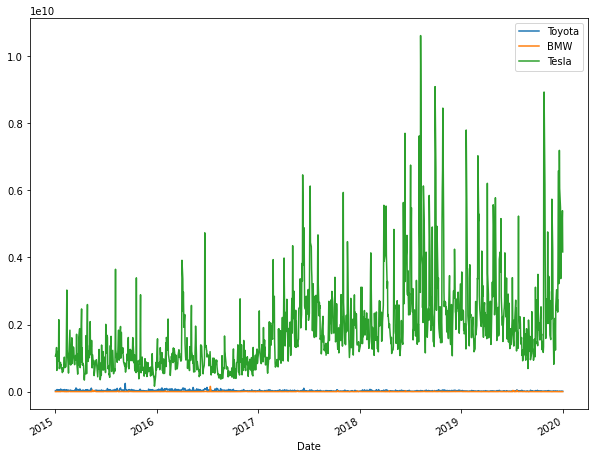

In [11]:
toyota['Total trade amount'].plot(label='Toyota',figsize=(10,8))
bmw['Total trade amount'].plot(label='BMW')
tesla['Total trade amount'].plot(label='Tesla')
plt.legend()

In [12]:
m1 = tesla['Total trade amount'].max()
tesla.loc[tesla['Total trade amount']==m1]

,High,Low,Open,Close,Volume,Adj Close,Total trade amount
Date,,,,,,,
2018-08-07,77.491997,67.830002,68.767998,75.914001,154379000,75.914001,1.061633e+10


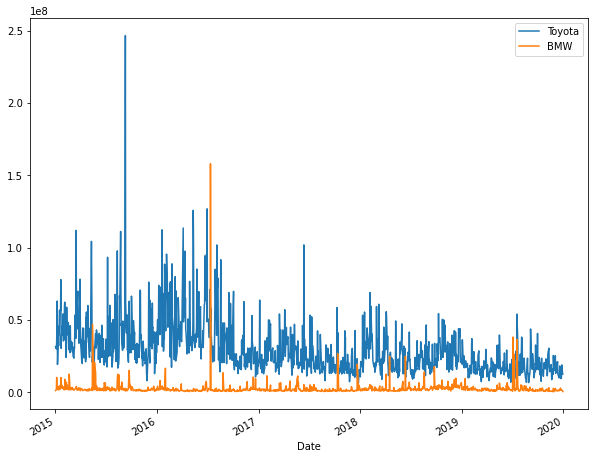

In [13]:
toyota['Total trade amount'].plot(label='Toyota',figsize=(10,8))
bmw['Total trade amount'].plot(label='BMW')
plt.legend()

# Moving average plot


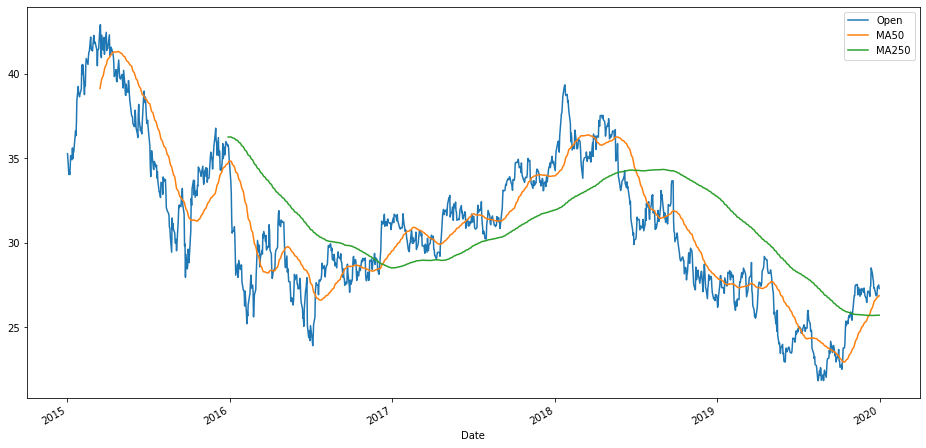

In [14]:
bmw['MA50'] = bmw['Open'].rolling(50).mean()
bmw['MA250'] = bmw['Open'].rolling(250).mean()
bmw[['Open','MA50','MA250']].plot(figsize=(16,8))

# Candlestick plot


In [15]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 70 kB 4.0 MB/s 


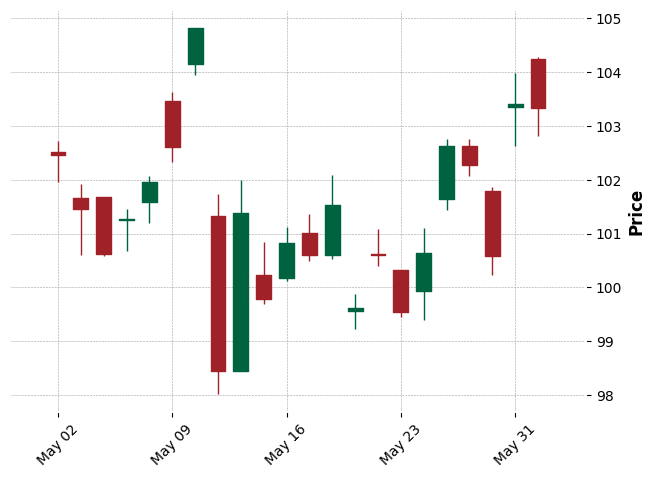

In [16]:
toyota_month = toyota['2016-05-01' :'2016-06-01']
mpf.plot(toyota_month,type='candle',style='charles')

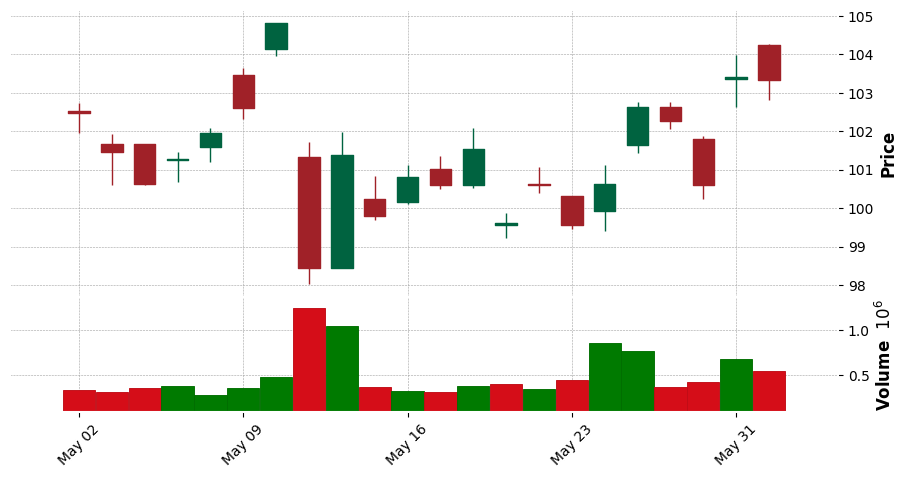

In [17]:
mpf.plot(toyota_month,type='candle',style='charles',volume=True,figratio=(10,5))

# Financial analysis

In [18]:
toyota['returns'] = (toyota['Close']/toyota['Close'].shift(1))-1
bmw['returns'] = (bmw['Close']/bmw['Close'].shift(1))-1
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1

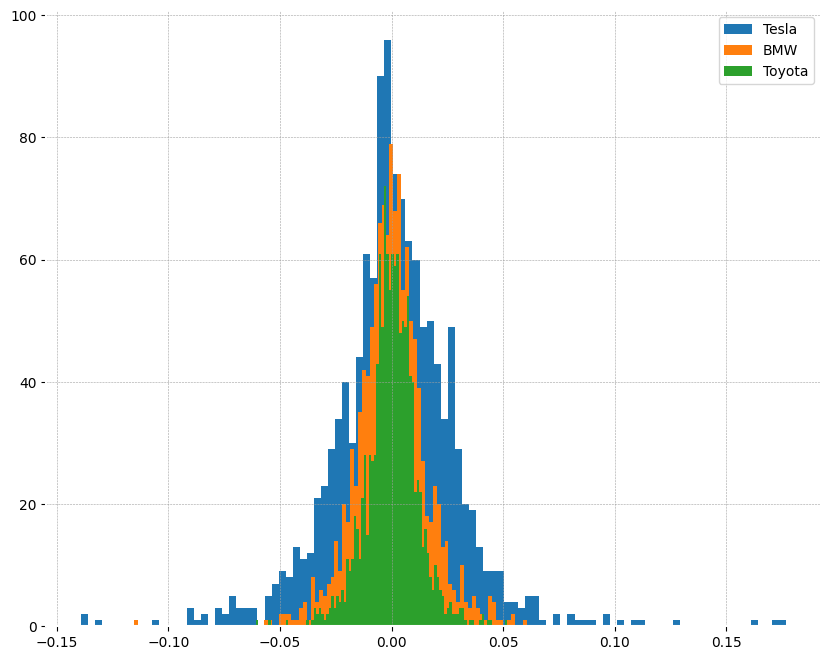

In [19]:
tesla['returns'].hist(bins=100, label='Tesla',figsize=(10,8))
bmw['returns'].hist(bins=100, label='BMW',figsize=(10,8))
toyota['returns'].hist(bins=100, label='Toyota',figsize=(10,8))
plt.legend()

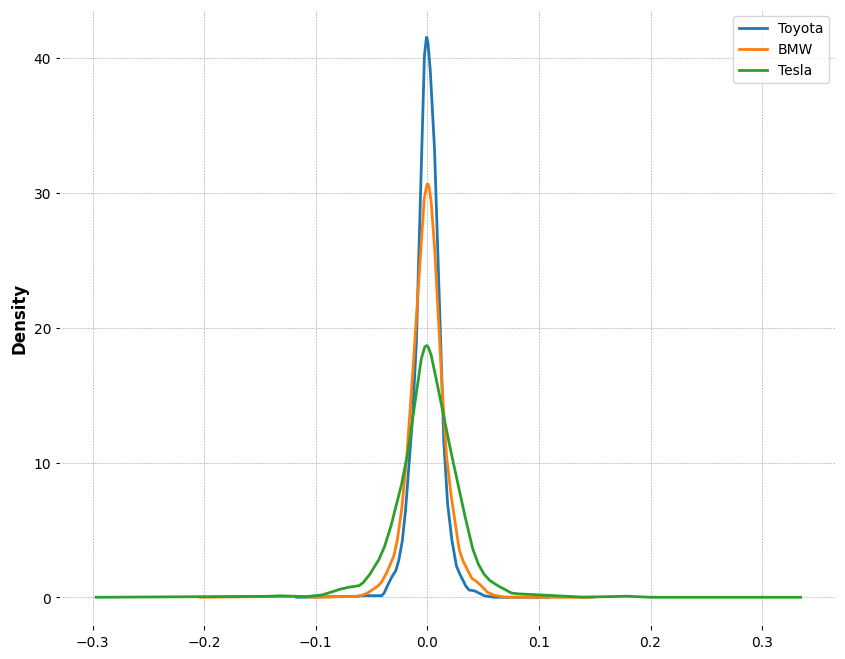

In [20]:
toyota['returns'].plot(kind='kde', label='Toyota',figsize=(10,8))
bmw['returns'].plot(kind='kde', label='BMW',figsize=(10,8))
tesla['returns'].plot(kind='kde', label='Tesla',figsize=(10,8))
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa07fb94ed0>,
      dtype=object)

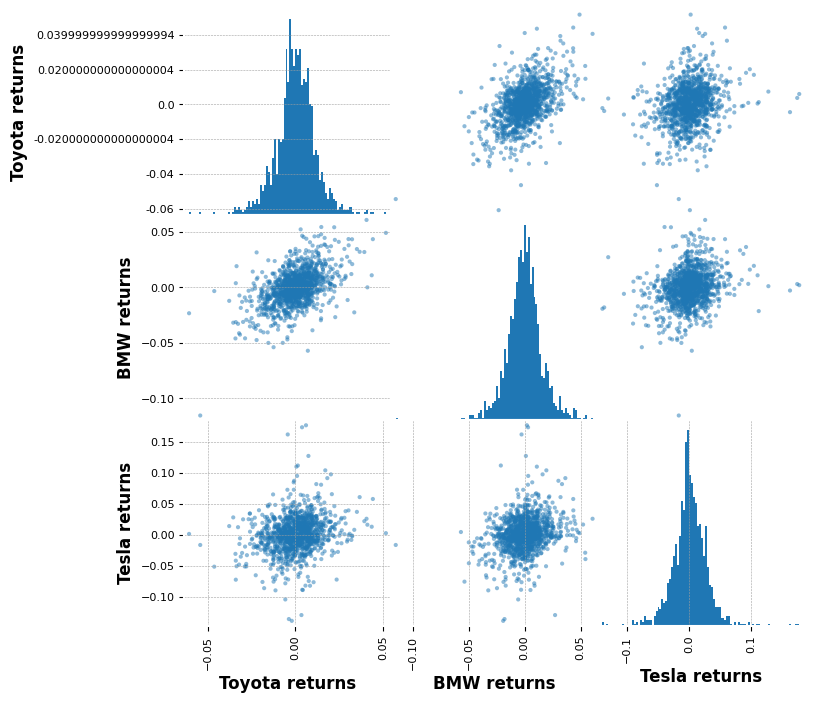

In [21]:
from pandas.plotting import scatter_matrix
comp_df = pd.concat([toyota['returns'],bmw['returns'],tesla['returns']],axis=1)
comp_df.columns = ['Toyota returns','BMW returns','Tesla returns']
scatter_matrix(comp_df,figsize=(8,8),hist_kwds={'bins':100})

# Cumulative returns


In [22]:
toyota['cumulative return'] = (1 + toyota['returns']).cumprod()
bmw['cumulative return'] = (1 + bmw['returns']).cumprod()
tesla['cumulative return'] = (1 + tesla['returns']).cumprod()

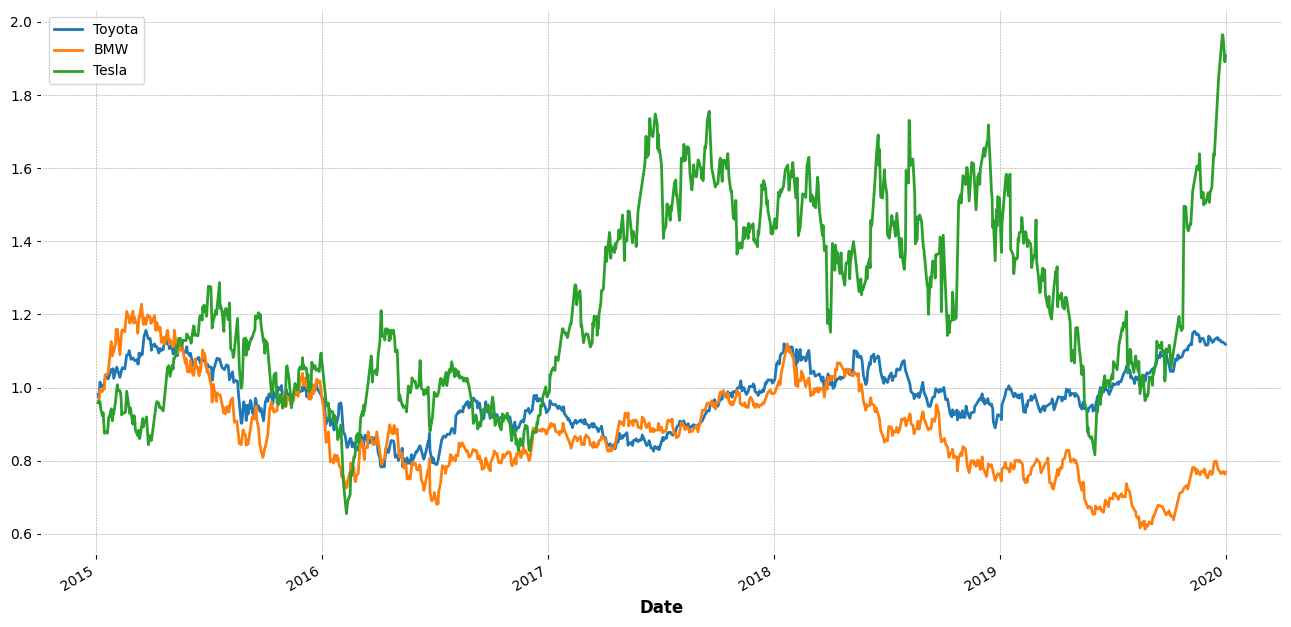

In [23]:
toyota['cumulative return'].plot(label='Toyota',figsize=(16,8))
bmw['cumulative return'].plot(label='BMW')
tesla['cumulative return'].plot(label='Tesla')
plt.legend()